![Geomática](../Recursos/img/geo_logo.jpg)
# Introducción a Pandas

**Sesión 8:** Pandas, un enfoque práctico.

# ¿Qué es Pandas?
Pandas es una librería orientada al análisis y transformación de datos, basada en el uso de matrices, donde cada columna corresponde a una serie de datos. Esta librería brinda una excelente API de alto rendimiento y, lo más importante, fácil de usar. Las estructuras de datos que implementa nosotros ya las conocemos: arreglos n-dimensionales de Numpy.

## Características relevantes:
Pandas es, con diferencia, la librería para análisis de datos más usada en Python, esto es debido a la fácilidad de uso que brindan las siguientes características:
- Importación y exportación de datos en diversos formatos, más que todo en formatos __csv y xlsx__. Estos datos son leídos y transformados en una estructura de datos llamada DataFrame, que en su núcleo, es un arreglo de Numpy.
- Manipulación de los datos de un DataFrame a través de sus propiedades o trabajando directamente con arreglos n-dimensionales.
- Reindexado, ploteo, etc.

# Introducción a Pandas
Empecemos por lo básico. La importación y su consenso:

In [1]:
# La forma de importar toda la librería de Pandas es similar a como ya conocemos.
# La única diferencia es que se tiene un consenso entre los desarrolladores de asignarle el alias "pd"
import pandas as pd
# Tenga en cuenta que aquí se está importando absolutamente toda la librería de Pandas. Esto significa
# que si se requiere algún módulo en específico de esta librería habría que nombrarlo. Esto se verá más adelante.

## Estructuras de datos core de Pandas
Es importante que nosotros entendamos cómo funcionan las estructuras de datos con las que Pandas trabaja. Estas son dos (2): __DataFrames__ y __Series__. Nosotros, que ya tenemos un conocimiento sobre matrices, podemos ver a las __Series__ como si se trataran de arrays que representará __cada uno__ una columna, donde cada elemento dentro de estos corresponderá a una fila. 

Los __DataFrames__ son la agrupación de las __Series__, así como una matriz computacional es la agrupación de varios arreglos, un DataFrame es la agrupación de varias Series, como se puede ver en la siguiente imagen:
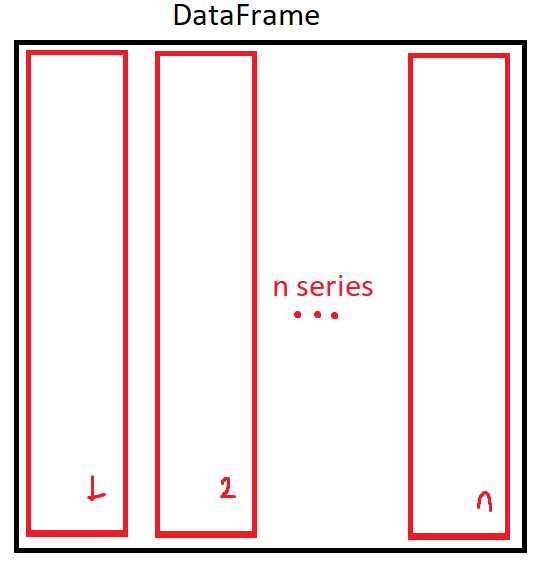

Una vez entendido este concepto, vamos a hacer un DataFrame manualmente para ver cómo se hace. Este paso solo será necesario de hacer cuando necesitamos crear DataFrames desde cero y sin tener ninguna estructura planteada anteriormente, es decir, en la mayoría de los casos no tendremos que hacer esto, como veremos más adelante.

In [2]:
# Para crear una Serie, vamos a necesitar que usar la función de Pandas que nos lo permite
# Vamos a crear dos Series que nos representen la columna de Insectos y Cantidad, presentes en un jardín.
insectos = pd.Series(['Mantiz', 'Hormiga', 'Saltamontes']) # Nótese que se llama al método Series, de la librería.
# Este método recibe como parámetro una estructura de datos ordenada e iterable. Las listas son perfectas para esto
# pero también pueden usarse, por ejemplo, arrays de numpy. Esto significa que si tenemos una lista preparada, 
# la podríamos usar para crear una Serie.
lista_cantidad = [25, 789, 10]
cantidad_insectos = pd.Series(lista_cantidad)
print (insectos)
print (cantidad_insectos)
# Nótese el índice y el tipo de dato. Este último se asigna automáticamente. ¿Les recuerda a algo?

0         Mantiz
1        Hormiga
2    Saltamontes
dtype: object
0     25
1    789
2     10
dtype: int64


In [3]:
# Ahora, con las series montadas, podemos crear el DataFrame. Esta no es la única forma de hacerlo, pero es la más sencilla
# e intuitiva.
insectos_jardin = pd.DataFrame({
    'Nombre Insecto': insectos, # Nótese que cada columna será cada Serie que creamos anteriormente
    'Cantidad': cantidad_insectos
})
print (insectos_jardin) # Es importante notar cómo se organizaron los datos de las Series

  Nombre Insecto  Cantidad
0         Mantiz        25
1        Hormiga       789
2    Saltamontes        10


¿Qué pasa si el número de filas de las Series __NO__ coindicen con las de los demás? Lo que pasará será que se "rellenarán" esos espacios con algo llamado NaN. Veamos un ejemplo.

In [4]:
insectos = pd.Series(['Mantiz', 'Hormiga', 'Saltamontes']) # 3 filas.
cantidad_insectos = pd.Series([25, 789, 10, 58]) # 4 filas.
insectos_jardin = pd.DataFrame({
    'Nombre Insecto': insectos, # Nótese que cada columna será cada Serie que creamos anteriormente
    'Cantidad': cantidad_insectos
})
print (insectos_jardin) # Nótese el NaN

  Nombre Insecto  Cantidad
0         Mantiz        25
1        Hormiga       789
2    Saltamontes        10
3            NaN        58


## Integración de Pandas y los Notebooks
Hasta el momento hemos visto todo mediante el uso de prints, pero los Notebooks permiten enriquecer muchas de las visualizaciones de datos, sin el uso de prints. Los Series y DataFrames de Pandas son uno de estos.

In [5]:
# Solo hace falta llamar la variable que contiene lo que queremos mostrar.
# También se puede hacer esto si es una función que retorna algo.
def func():
    return "hola"
func()

'hola'

In [6]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Saltamontes,10
3,NaN,58


Interesante, ¿verdad?

## Accediendo a los datos de un DataFrame
Ya sabemos cómo crear un DataFrame y mostrarlo. Veamos cómo podemos acceder a un dato de estos.

Esto se hace llamando a la columna, y el índice de esta.

In [7]:
insectos_jardin["Cantidad"][0] # Primer elemento de la columna 'Cantidad'

25

Aunque también podemos hacerlo a modo de matriz mediante la propiedad __iloc__. Nótese que __NO__ es un método, sino un atributo, por lo tanto, las _coordenadas_ se les envían con corchetes, no con paréntesis. Esto significa que podemos aplicar los conceptos de Slicing sobre matrices que ya conocemos.

In [8]:
insectos_jardin.iloc[0,0] # Primer elemento de la primera columna

'Mantiz'

In [9]:
insectos_jardin.iloc[:2,0] # Primeros dos elementos de la primera columna

0     Mantiz
1    Hormiga
Name: Nombre Insecto, dtype: object

In [10]:
type(insectos_jardin.iloc[:2,0]) # Lo que esto retorna son Series, si es más de un dato.

pandas.core.series.Series

También es posible obtener toda una serie llamándola a través de la propiedad del DataFrame. Pandas, por cada Serie que tenga un nombre, permite acceder a ella a como si de un atributo se tratara. Es importante aclarar que el nombre es sensible a mayúsculas y minúsculas.

In [11]:
insectos_jardin.Cantidad # Nótese que accedimos directamente con el nombre de la Serie

0     25
1    789
2     10
3     58
Name: Cantidad, dtype: int64

In [12]:
# Lo mismo se logra de esta forma:
insectos_jardin["Cantidad"]
# Esta se usaría si queremos acceder a la serie pero esta contiene un nombre con espacios o símbolos especiales

0     25
1    789
2     10
3     58
Name: Cantidad, dtype: int64

Podemos usar la función __len__ para conocer el número de filas. Esto es útil para varios propósitos.

In [13]:
len(insectos_jardin)

4

A veces querremos todos los datos en formato de matriz, pero ya organizados gracias a Pandas, es decir, ya no queremos el DataFrame, pero sí queremos una matriz que contenga los datos.

In [14]:
matriz = insectos_jardin.to_numpy() # Nos devolverá un array bidimensional de Numpy
print (matriz)

[['Mantiz' 25]
 ['Hormiga' 789]
 ['Saltamontes' 10]
 [nan 58]]


In [15]:
matriz[-1,0]

nan

## Manipulando los datos de un DataFrame
Ya sabemos como acceder a los datos, veamos cómo se manipulan. Es muy importante tener en cuenta que cuando esto se quiera hacer, lo mejor es hacerlo a través de la propiedad iloc, debido a que de otra forma, pueden darse problemas. Preste mucha atención a la explicación oral.

In [16]:
# Recordemos nuestro DataFrame
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Saltamontes,10
3,NaN,58


In [17]:
# Supongamos que quiero asignarle un nombre al último insecto presente, para que no sea NaN.
insectos_jardin.iloc[-1,0] = "Abeja"

In [18]:
insectos_jardin # ¡Perfecto!

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Saltamontes,10
3,Abeja,58


In [19]:
# Esto es lo que ocurre si tratamos de hacerlo sin el iloc.
insectos_jardin['Nombre Insecto'][-2] = 'Grillo' # Vamos a cambiar el nombre de "Saltamontes" a "Grillo" sin el iloc

<ipython-input-19-05398bce0eb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insectos_jardin['Nombre Insecto'][-2] = 'Grillo' # Vamos a cambiar el nombre de "Saltamontes" a "Grillo" sin el iloc


In [20]:
insectos_jardin # ¡No pasó nada!

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Saltamontes,10
3,Abeja,58


El motivo por lo que esto pasa es debido a que, al acceder a un dato (o varios) a través del nombre de la columna, Pandas lo interpretará como motivo de visualización, cuando nosotros queremos es editar. Mientras que el iloc trabaja directamente con el array n-dimensional.

In [21]:
insectos_jardin.iloc[-2,0] = "Grillo"

In [22]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,10
3,Abeja,58


Teniendo en cuenta la ventaja que tiene el iloc en este campo, podemos aplicar técnicas que nosotros ya conocemos, como el slicing, para hacer varias modificaciones al mismo tiempo. Por ejemplo, multiplicar x2 la cantidad de las últimas dos filas.

In [23]:
insectos_jardin.iloc[2:,1] *= 2 # De las últimas dos filas, segunda columna, multiplicamos su valor por dos.

In [24]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20
3,Abeja,116


### Añadir una o varias filas
Cuando estamos manipulando datos, a veces es necesario añadir toda una nueva fila al completo. Esto se logra fácilmente usando un método de los DataFrames llamado append.

Este método toma como parámetro una lista, ndarray, Serie, diccionario o DataFrame. Si el DataFrame al que se quiere añadir ya contiene nombres de columnas, y se pasa un número similar de elementos que a su vez, estén agrupados con índices/llaves similares, esta se añadirá sin ningún problema, es decir, si el DataFrame original tiene índices como nombres de columnas, una lista podría funcionar. Como casi siempre los DataFrames tendrán nombres de columnas (llaves) en lugar de índices, __lo ideal__ es enviar como parámetro un DataFrame o diccionario, ya que estos sí separan las columnas por llaves.

El método append __siempre__ retorna un DataFrame nuevo, por lo tanto, nunca modificará al original. Es trabajo del desarrollador reemplazar el original con el nuevo, guardarlo en otra variable, o cualquiera de las operaciones que desee hacer con el DataFrame resultante.

Este método tiene un parámetro opcional llamado __ignore_index__. Este parámetro sirve para, al momento de añadir, seguir la cuenta de índices actual o literalmente pegar los nuevos índices al DataFrame. Con diccionarios es obligatorio su uso en __True__. Lo recomendado es que siempre esté como __True__.

Veamos un ejemplo.

In [25]:
# Usando una lista. Nótese que al ser una estructura unidimensional, se agrega a la primera columna.
# ignore_index es falso por defecto.
insectos_jardin.append(["Prueba", 300])

,0,Cantidad,Nombre Insecto
0,NaN,25.0,Mantiz
1,NaN,789.0,Hormiga
2,NaN,20.0,Grillo
3,NaN,116.0,Abeja
0,Prueba,NaN,NaN
1,300,NaN,NaN


In [26]:
# Usando una lista bidimensional. Nótese que ahora, al ser bidimensional, los índices son tomados como los nombres
# de las columnas, por lo tanto, al no existir en el DataFrame original, las añade. Esto usualmente NO es ideal.
# ignore_index = True, # Vea los índices.
insectos_jardin.append([["Prueba", 300], ["Prueba2", 400]], ignore_index = True)

,0,1,Cantidad,Nombre Insecto
0,NaN,NaN,25.0,Mantiz
1,NaN,NaN,789.0,Hormiga
2,NaN,NaN,20.0,Grillo
3,NaN,NaN,116.0,Abeja
4,Prueba,300.0,NaN,NaN
5,Prueba2,400.0,NaN,NaN


In [27]:
# Usando un diccionario. Nótese que las llaves del diccionario se llaman igual a las Series del DataFrame original.
# ignore_index = True. Esto es obligatorio para un diccionario.
# Nótese que ese método sirve para añadir de a uno por uno.
insectos_jardin.append({
    "Nombre Insecto": "Prueba", # Los nombres son sensibles a mayúsculas y minúsculas. Tiene que ser exacto.
    "Cantidad": 300
}, ignore_index = True)

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20
3,Abeja,116
4,Prueba,300


In [28]:
# Usando un DataFrame. Este método es útil si queremos añadir varias filas de una vez.
nuevo = pd.DataFrame({
    "Nombre Insecto": ["Prueba", "Prueba2"], # Nótese que no son Series sino listas. Lo ideal es que sean Series.
    "Cantidad": [300, 400]
})
insectos_jardin.append(nuevo, ignore_index = True)

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20
3,Abeja,116
4,Prueba,300
5,Prueba2,400


Recordemos que el método append __NO__ modifica el DataFrame original, sino __retorna__ uno nuevo, por lo que el DataFrame original sigue intacto. En caso de querer sustituir el original, tendríamos que redefinir la variable que lo contiene.

In [29]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20
3,Abeja,116


### Eliminar una fila existente
A veces, es necesario deshacerse no de una columna, sino de una fila. Para esto usaremos el método drop de los DataFrames.

In [30]:
# Este método toma como parámetro el índice de la fila. Aquí no se pueden usar índices negativos.
# Él retorna el DataFrame con la fila eliminada. Esto es útil si queremos tener el DataFrame original por separado.
insectos_jardin.drop(3)

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20


In [31]:
# Como se puede ver, el original está intacto.
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20
3,Abeja,116


In [32]:
# Pero si se le define el parámetro inplace como verdadero hacemos referencia que queremos modificar el DataFrame original.
insectos_jardin.drop(3, inplace = True)

In [33]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20


### Añadir una columna nueva
A veces es necesario añadir una nueva columna a un DataFrame existente, para lograr esto es tan sencillo como cuando se crea un nuevo elemento en un diccionario. La única condición es que lo que se le asigne debe ser una Serie también, así esté vacía (en cuyo caso saldrá una advertencia).

In [34]:
insectos_jardin["Color"] = pd.Series(["Verde","Negra"])

In [35]:
insectos_jardin

,Nombre Insecto,Cantidad,Color
0,Mantiz,25,Verde
1,Hormiga,789,Negra
2,Grillo,20,NaN


### Rellenar los NaN
Algunas veces necesitamos rellenar los NaN con algún valor que nos sirva. Para esto se usa el método __fillna__ de las __Series__, es decir, tenemos que acceder a una serie del DataFrame (o la serie en sí misma, si no está en un DataFrame). Veamos un ejemplo.

In [36]:
insectos_jardin["Color"].fillna("Sin color", inplace = True)

In [37]:
insectos_jardin

,Nombre Insecto,Cantidad,Color
0,Mantiz,25,Verde
1,Hormiga,789,Negra
2,Grillo,20,Sin color


### Eliminar una columna existente
A veces también es necesario eliminar una columna. Hay 3 formas de hacerlo, pero la siguiente es la más intuitiva:

In [38]:
# El método pop toma como parámetro la Serie a eliminar. Si existe, la elimina y la retorna (por si se quiere guardar).
# Las otras dos formas es usar la función "del" de Python y el método drop de Pandas.
insectos_jardin.pop("Color")

0        Verde
1        Negra
2    Sin color
Name: Color, dtype: object

In [39]:
insectos_jardin

,Nombre Insecto,Cantidad
0,Mantiz,25
1,Hormiga,789
2,Grillo,20


## Ejercicio: Creación de un DataFrame (10 mins)
Cree un DataFrame que se vea similar al siguiente:
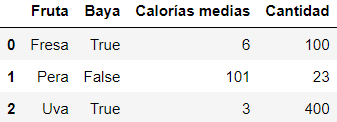
Use Series para el contenido de cada columna.
Guárdelo dentro de una variable llamada __df__.

In [40]:
# Tu código aquí.

## Ejercicio: Añada una columna (3 mins)
Añada una nueva columna al DataFrame llamada "Total calorías". Dicha columna debe estar llena de ceros y el resultado debería verse similar a esto:
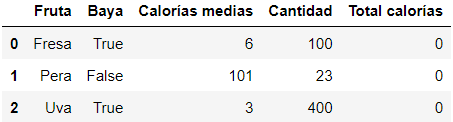

In [41]:
# Tu código aquí.

## Ejercicio: Modificación de una columna completa (2 mins)
Divida de forma __entera__ toda la columna Cantidad, de la copia del DataFrame anterior, por 3.5. El resultado debería verse similar al siguiente:
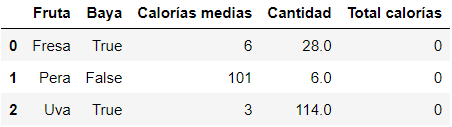
Cuando tenga la respuesta correcta, reemplace a __df__ por la copia.

In [42]:
# Tu código aquí. El método para guardar una copia es el de la línea siguiente:
# COPIA = df.copy()

## Ejercicio: Modificación de una columna respecto a otra (10 mins)
Haga una copia del DataFrame que tiene hasta el momento. Cambie la columna "Total calorías" por la multiplicación entre "Calorías medias" y "Cantidad". Lo puede hacer de varias formas, use la que más le guste. El resultado debe verse similar al siguiente:
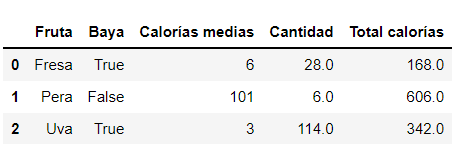
Cuando tenga la respuesta correcta, reemplace a df por la copia.

In [43]:
# Tu código aquí. El método para guardar una copia es el de la línea siguiente:
# COPIA = df.copy()

# Importado de datos
En la gran mayoría de casos, nosotros no vamos a crear nuestros propios *datasets* a mano, sino que vamos a descargarlos de alguna base de datos o proveedor de información, para, posteriormente, importarlo dentro de Pandas y poder trabajar con él. 

Pandas permite esto mediante métodos especiales para cada formato. El más común es __.csv__, este formato se caracteriza por agrupar los datos a partir de filas, separando cada dato de cada columna con una coma. Preste atención a la explicación oral.

Veamos cómo podemos traer estos datos directamente a Pandas.

In [44]:
# Lo más importante es tener el archivo a la mano. Nosotros tenemos dos dentro de la carpeta "Datos" presente dentro de esta
# sesión.
datos = pd.read_csv("./datos/winequality-red.csv")

Nótese que se usó el método __read_csv__. Este es el que permite importar los archivos csv. Si queremos importar un archivo Excel, usaríamos __read_excel__.

Ambos métodos tienen parámetros diferentes, pero todos menos la ruta del archivo vienen por defecto. Estos parámetros, evidentemente, pueden ser modificados como nosotros ya sabemos. Uno que suele ser común modificar es el parámetro __*sep*__ de *read_csv*, debido a que este toma un string que indica el separador. Este suele ser una coma (","), pero hay algunos datasets que están separados por otro símbolo, por ejemplo, un punto y coma (";").

La lista de todos los parámetros del método read_csv es [esta.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [45]:
# Veamos lo que devolvió la función read_csv
type(datos)

pandas.core.frame.DataFrame

Dado que, ahora dentro de la variable "datos" tenemos un DataFrame, podemos empezar a aplicar lo que ya conocemos y aprender nuevos conceptos.

La fuente del dataset que vamos a trabar es [esta.](https://www.kaggle.com/brendan45774/wine-quality)

In [46]:
datos # ¡Esto está terrible! ¿Por qué?

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [47]:
datos = pd.read_csv("./datos/winequality-red.csv", sep = ";")

In [48]:
datos # Ahora sí

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Como podemos ver, si nosotros usamos la vista enriquecida del Notebook con el dataset recién montado tendremos algo así como un "vistazo" a los primeros y últimos datos, junto con sus respectivas columnas.

## Inspeccionando el dataset
Ya tenemos el dataset cargado en memoria a través del objeto de tipo DataFrame. Veamos algunas formas de obtener información al respecto.

In [49]:
# Hay veces que solo queremos una pequeña muestra de los primeros datos
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
# Dado que, al final como se manejan los datos es con un array n-dimensional, 
# tenemos acceso a la propiedad shape sobre el DataFrame
datos.shape

(1599, 12)

La gran mayoría de las veces queremos es un resumen rápido de nuestro dataset. Esto se logra con el método "describe". Preste mucha atención a la explicación oral.

In [51]:
# Este método es muy útil para tener información al respecto sobre nuestros datos.
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Siendo específicos sobre las filas que devuelve el método describe, son las siguientes:
- __count__: Conteo de datos válidos en la serie. A más cercano o igual al máximo número de filas, mejor.
- __mean__: Es el promedio de los valores numéricos presentes dentro de la serie.
- __std__: La desviación estándar.
- __min__: El mínimo valor numérico dentro de la serie.
- __Percentiles__: Por defecto es el percentil 25%, 50% y 75%.
- __max__: El máximo valor en la serie.

__Nota__: Este dataset que estamos utilizando es de EXCELENTE calidad. No siempre se tendrán datasets tan bonitos, ordenados y procesados. Es más, casi nunca.

In [52]:
# Este método es para tener un resumen rápido de las Series del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Muchas veces vamos a necesitar acceder o tomar los elementos de series que no estén contiguas, esto hace que se dificulte el uso del iloc o que se tengan que hacer pasos adicionales. Afortunadamente Pandas tiene una forma sencilla de hacer esto. Basta con escribir el código de tal forma que quisieramos ver todos los valores de una Serie dentro de un DataFrame, pero, en este caso, en lugar de enviar el nombre de la Serie, se envía una lista con los nombres de las Series.

In [53]:
# Nótese que la columna "citric acid" está bien alejada de la "density"
# pero, de esta forma podemos, obtener un "reporte" de ambas sin ningún problema.
datos[["citric acid", "density"]]

,citric acid,density
0,0.00,0.99780
1,0.00,0.99680
2,0.04,0.99700
3,0.56,0.99800
4,0.00,0.99780
...,...,...
1594,0.08,0.99490
1595,0.10,0.99512
1596,0.13,0.99574
1597,0.12,0.99547


## Ejercicio: Accediendo a los datos de un dataset real (15 mins)
Haga las siguientes operaciones:
- Muestre los 500 primeros datos de la columna citric acid.
- Muestre los últimos 500 datos de las columnas chlorides, free sulfur dioxide y total sulfur dioxide.
- Muestre los 100 primeros datos de las columnas quality y density.
- Muestre los 200 últimos datos de las columnas quality y citric acid.
- Muestre desde el índice 500 hasta el índice 510 de la columna pH.

In [54]:
# Tu código aquí

## Filtrado
Generalmente, cuando se tienen grandes datasets, es necesario filtrar datos basados en ciertos criterios. Esto en Pandas se puede lograr fácilmente aplicando operaciones lógicas. Veamos un ejemplo.

In [55]:
# Supongamos que queremos tomar un sub dataset solo con los vinos que tengan una calidad igual o superior a 6,
# para, posteriormente, analizar sus características.
datos[datos.quality >= 6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


### Múltiples filtros
Muchas veces va a ser necesario aplicar varios filtros al mismo tiempo. Uno pensaría que basta con aplicar el patrón que vimos anteriormente, junto con un operador lógico __and__ u __or__. El problema es que esto no funcionará por como Pandas maneja los booleanos dentro de las Series. Veamos un ejemplo de cómo uno pensaría que funcionaría.

In [56]:
# Como son operaciones lógicas, podemos aplicar filtros más específicos. Por ejemplo, filtremos por calidad >= 6
# y pH >= 3.42
# Lo siguiente debería funcionar, ¿verdad?
datos[datos.quality >= 6 and datos.pH >= 3.42]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Como se puede evidenciar, no funciona. Veamos qué hace Pandas internamente.

In [57]:
datos.quality >= 6 # Nótese lo que retorna esto, una Serie con verdaderos y falsos.

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

Teniendo en cuenta que Pandas lo que hace es una Serie por cada filtro, la librería tiene entonces que aplicar otras operaciones por debajo para que varios filtros se puedan aplicar. Por esto, se tienen las siguientes condiciones para un filtro múltiple:
- __CADA__ filtro debe de estar agrupado con un paréntesis si se va a usar en conjunto con más filtros. Ej: "(datos.quality >= 6)" en lugar de "datos.quality >= 6".
- Los __and__ se sustituyen por un __&__.
- Los __or__ se sustituyen por un __|__.
- Los __not__ se sustituyen por un __~__.

Veamos como quedaría el filtro anterior hecho correctamente.

In [58]:
# Filtremos por calidad >= 6 y pH >= 3.42.
datos[(datos.quality >= 6) & (datos.pH >= 3.42)] # Cada filtro agrupado con () y el operador lógico sustituido.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


La mayoría de veces nosotros no solo queremos visualizar el resultado, sino queremos operar con el DataFrame resultante. Es por esto que podemos guardarlo dentro de otra variable.

In [59]:
RESULTADO = datos[(datos.quality >= 6) & (datos.pH >= 3.42)]
type(RESULTADO)

pandas.core.frame.DataFrame

In [60]:
RESULTADO # La variable contiene el DataFrame perfectamente.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [61]:
# Este método nos retorna los valores únicos de una serie. El resultado es un array de Numpy.
RESULTADO.quality.unique()

array([6, 7, 8], dtype=int64)

### Ejercicio: Filtrado de datos (15 mins)
Guarde en una variable diferente los resultados de cada uno de los siguientes filtros:
- fixed acidity >= 7.8 y chlorides < 0.08. __Len rta__: 369
- alcohol > 10 y quality < 6. __Len rta__: 235
- free sulfur dioxide > 50 y pH < 3. __Len rta__: 0
- quality >= 7 y (residual sugar < 3 o pH > 3). __Len rta__: 216
- volatile acidity igual a 0.880 y total sulfur dioxide igual a 67.0. __Len rta__: 1

Filtre sobre la variable __datos__. __NO__ vaya a reasignarla.

In [62]:
# Tu código aquí

## Muestreo de datos
En algunas aplicaciones, generalmente el Machine Learning, es necesario hacer muestreos aleatorios de los datasets. Esto Pandas lo permite hacer de forma sencilla. Incluso nos permite hacer operaciones adicionales.

Veamos el uso básico.

In [63]:
# Usaremos el método sample para tomar un solo elemento aleatorio entre todo el DataFrame
datos.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.2,0.45,0.2,1.6,0.069,3.0,15.0,0.9958,3.41,0.56,9.2,5


In [64]:
# Ahora usaremos el parámetro frac para decir cuánto de la fracción queremos de mucestra aleatoria. 1 es todo.
datos.sample(frac=0.005) #0.5%

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4,5
345,7.0,0.685,0.00,1.9,0.067,40.0,63.0,0.99790,3.60,0.81,9.9,5
1226,7.5,0.580,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2,5
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
499,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1183,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,5
1432,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6
1025,8.6,0.830,0.00,2.8,0.095,17.0,43.0,0.99822,3.33,0.60,10.4,6


In [65]:
# Ahora queremos el 0.5% como muestra aleatoria, pero con índices nuevos.
datos.sample(frac=0.005).reset_index() # Nótese que ahora nos creó una nueva columna llamada index, esta era el índice anterior.

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7
1,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,1536,6.1,0.530,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3,6
3,1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6
4,732,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5
5,161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4
6,1428,7.8,0.640,0.00,1.9,0.072,27.0,55.0,0.99620,3.31,0.63,11.0,5
7,1229,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5


In [66]:
# Lo mismo que antes, pero sin la columna adicional.
datos.sample(frac=0.005).reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6
1,11.0,0.200,0.48,2.0,0.343,6.0,18.0,0.99790,3.30,0.71,10.5,5
2,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
3,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
4,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
5,11.2,0.400,0.50,2.0,0.099,19.0,50.0,0.99783,3.10,0.58,10.4,5
6,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5
7,7.1,0.460,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5


¿Pero y si no quiero un porcentaje del dataset sino un número fijo? En dado caso no se usa el parámetro *frac* sino el parámetro *n*. Ambos no funcionan en conjunto.

Lo relacionado con el reset_index también se puede aplicar aquí.

In [67]:
datos.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1015,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6
1115,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
944,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5


Para que sea replicable, es posible establecer una semilla para que la pseudoaleatoriedad sea similar en cada ejecución. Esto se logra usando el parámetro __random_state__.

In [68]:
# La semilla sería 2021. Si se ejecuta varias veces esta celda, siempre saldrán los mismos elementos, a diferencia
# de los ejemplos de muestreo anteriores.
datos.sample(n=5, random_state=2021)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1157,5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7
1215,8.8,0.27,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3,6
125,9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
640,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6


## Ordenamiento
Algunas veces será necesario ordenar los datos, ya sea para visualizar y analizar o para que simplemente los datos queden ordenados basados en un criterio. Esto se logra a partir del método __sort_values__ de los DataFrames. Este método ordena usando el algoritmo __quicksort__ por defecto. No obstante, este puede ser cambiado al *mergesort* o *heapsort* usando el parámetro __kind__. Generalmente no es necesario cambiar el algoritmo de ordenamiento.

El parámetro que nosotros tendremos que enviar de forma obligatoria será el nombre de la columna por la cual nosotros queremos tomar como criterio para ordenar.

El ordenamiento por defecto es ascendente, pero puede ser cambiado a descendente mediante el parámetro __ascending__ como falso.

Si queremos que los índices de las filas se recuenten usaríamos el parámetro __ignore_index__ como verdadero.

Este método también tiene un parámetro __inplace__. Es similar a los demás *inplace* que hemos visto. Por defecto viene como falso.

Veamos un ejemplo.

In [69]:
MUESTRA_ORDENADA = datos[:10] # Vamos a tomar los 10 primeros elementos del dataset para ordenarlos en una variable aparte.

In [70]:
MUESTRA_ORDENADA

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [71]:
# Ordenamos por pH
MUESTRA_ORDENADA.sort_values('pH')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [72]:
# Ordenamos por pH, pero en forma descendente
MUESTRA_ORDENADA.sort_values('pH', ascending = False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [73]:
# Ordenamos por pH, descendente y reiniciando los índices.
MUESTRA_ORDENADA.sort_values('pH', ascending = False, ignore_index = True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
3,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
4,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
5,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
8,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
9,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [74]:
# Ordenamos por pH, descendente, reiniciando los índices y reemplazando el original.
# Saldrá una advertencia pero no hay que preocuparse.
MUESTRA_ORDENADA.sort_values('pH', ascending = False, ignore_index = True, inplace = True)

C:\Users\radou\miniconda3\envs\PPython\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [75]:
MUESTRA_ORDENADA

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
3,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
4,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
5,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
8,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
9,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


## Creando DataFrames a partir de ndarrays bidimiensionales
Ya hemos visto como crear nuestros propios DataFrames manualmente e incluso importando datasets de otras fuentes. Pero... ¿y si lo que queremos es crear un DataFrame a partir de una matriz bidimensional que tengamos en Numpy? Ya sabemos que podemos pasar de DataFrame a matriz, ¿se puede al contrario? La respuesta es sí.

Veamos cómo.

In [76]:
import numpy as np
matriz = np.random.randint(10, size = (4,4)) # Esto crea una matriz bidimensional de 4x4 con números aleatorios entre 0 y 9.
matriz

array([[1, 1, 7, 4],
       [6, 0, 8, 1],
       [9, 8, 0, 0],
       [8, 7, 9, 3]])

In [77]:
# De esta forma tan simple nosotros convertimos una matriz bidimensional en un DataFrame
nuevo_df = pd.DataFrame(matriz)
nuevo_df # Nótese que las columnas quedaron nombradas por el índice de la matriz.

,0,1,2,3
0,1,1,7,4
1,6,0,8,1
2,9,8,0,0
3,8,7,9,3


In [78]:
# Nosotros podemos cambiar los nombres de las columnas de esta forma:
nuevo_df.columns = ["E1", "E2", "A1", "A2"]
nuevo_df # ¿Sencillo, verdad?
# Nota: Si se escriben más columnas de las que existen, saldrá un error.

,E1,E2,A1,A2
0,1,1,7,4
1,6,0,8,1
2,9,8,0,0
3,8,7,9,3


## Exportación de DataFrames a datasets
La gran mayoría de las veces, uno desea guardar sus dataframes como un nuevo dataset. Esto es muy útil cuando se están procesando datos, analizando datos, etc. Veremos que es muy sencillo. Esto se hace con un método llamado __to_csv__ de los DataFrames. Este método tiene varios parámetros, pero veremos los 3 más importantes:
- __path_or_buf__: Es la ruta en donde guardaremos el dataset. Este parámetro es obligatorio.
- __sep__: Es el símbolo que se usará como separador, por defecto es una coma. 
- __index__: Este sirve para, al momento de guardar el dataset, se cree una columna adicional con el índice. Por defecto es verdadero, pero se recomienda dejarlo como falso.

In [79]:
# Vamos a guardar el dataset de insectos que habíamos hecho anteriormente.
# Al ejecutar esta celda, crearemos un archivo llamado insectos.csv. Recomiendo abrirlo y chequearlo.
insectos_jardin.to_csv("./insectos.csv", sep=";", index = False)

In [80]:
# Vamos a guardar el dataset de muestras ordenadas.
MUESTRA_ORDENADA.to_csv("./muestras_ordenadas.csv", index = False)

In [81]:
# Vamos a guardar el dataset de la matriz bidimensional. Queremos conservar el índice de las filas.
nuevo_df.to_csv("./matriz.csv")

## Ploteo
Ya estamos llegando al final de este recorrido general sobre Pandas. Veremos una de las herramientas más potentes que este tiene, el plotting. Todas estas herramientas necesitan de la ayuda de otra librería llamada matplotlib. Esta la veremos con más detalle en la sesión siguiente, por ahora, vamos a importarla.

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

### Histogramas
Un histograma es una gráfica que muestra las frecuencias de una variable. Para plotear un histograma basta con usar el método __hist__ de los DataFrames y enviarle como parámetro la columna a plotear.

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

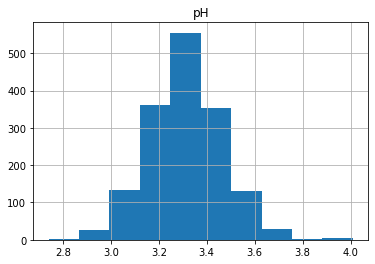

In [83]:
datos.hist('pH')

array([[<AxesSubplot:title={'center':'residual sugar'}>]], dtype=object)

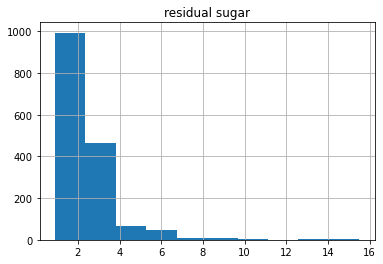

In [84]:
datos.hist('residual sugar')

### Planos
Pandas nos permite hacer gráficas de la evolución de una o varias columnas, respecto a los valores de sus filas. Esto se hace mediante el método __plot__

<AxesSubplot:>

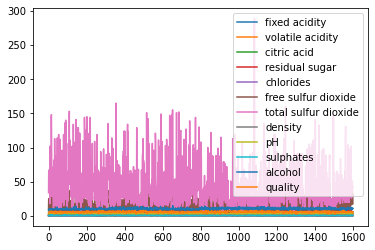

In [85]:
# Esta sería una gráfica de todos los elementos del DataFrame datos. Así no es muy útil, ¿verdad?
datos.plot()

<AxesSubplot:>

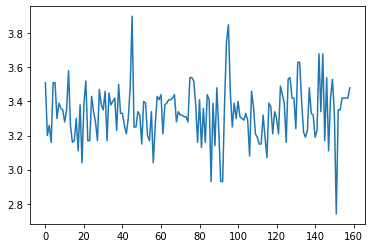

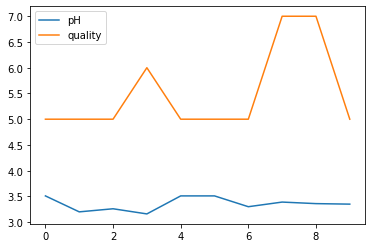

In [86]:
# Por fortuna, Pandas permite seleccionar una o varias columnas para plotear, en lugar de tener todas al mismo tiempo
datos['pH'][:int(len(datos)*0.1)].plot() # Ploteo del primer 10% de la columna pH
datos[['pH', 'quality']][:10].plot() # Ploteo de las primeras 10 filas de las columnas pH y quality

<AxesSubplot:>

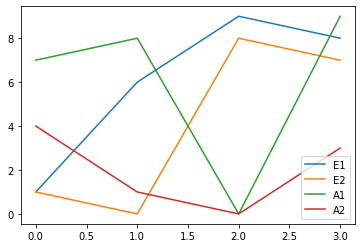

In [87]:
# Ploteo de todos los valores de la matriz. El eje x es cada una de las filas.
nuevo_df.plot()

<AxesSubplot:>

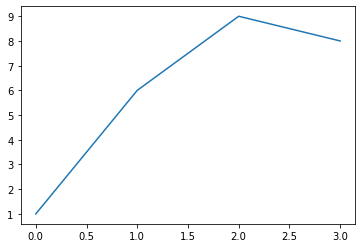

In [88]:
# Ploteando solo una columna, llamándola como atributo del objeto
nuevo_df.E1.plot()

También es posible usar este método con muestras aleatorias o con cualquier DataFrame generado.

<AxesSubplot:>

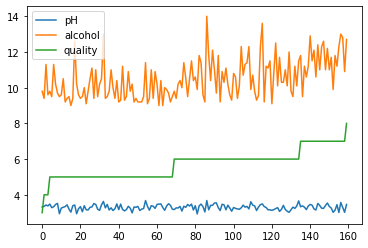

In [89]:
# Este es un ploteo mucho más compuesto. Veamos en qué consiste parte por parte.
# 1. Sacamos solo las columnas pH, alcohol y quality.
# 2. Sacaremos una muestra aleatoria del 10% del dataset.
# 3. La organizaremos de formas ascendente de acuerdo a la calidad (quality)
# 3.5. IMPORTANTE: Estamos reseteando el índice resultante, para que la gráfica tenga sentido. Pruebe con esto en False.
# 4. Se plotea el DataFrame resultante.
datos[['pH', 'alcohol', 'quality']].sample(frac=0.1).sort_values('quality', ignore_index=True).plot()

## Gráficas de dispersión (scatter)
En muchas situaciones es mejor ver una gráfica de dispersión. Pandas permite hacer esto mediante la función __scatter__, esta se encuentra dentro del atributo __plot__ de los DataFrames.

Esta función toma como parámetros básicos __x__ e __y__. Estos se asignan de acuerdo con las columnas que vayan a representan cada eje.

Estas gráficas son muy útiles para ver correlaciones entre datos.

Veamos un ejemplo.

<AxesSubplot:xlabel='quality', ylabel='pH'>

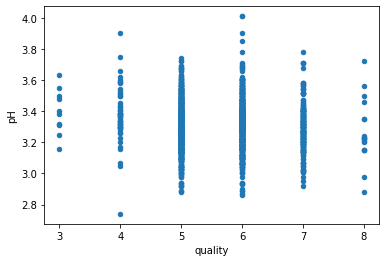

In [90]:
datos.plot.scatter(x="quality", y="pH")

### La matriz de dispersión
Así como podemos ver la gráfica de dispersión de una columna respecto a otra, podemos hacer este proceso para cada una de las columnas del DataFrame, para ayudarnos a buscar correlaciones o visualizar más fácilmente el comportamiento de los datos respecto a otros.

Esta gráfica tan poderosa se logra a través de la función __scatter_matrix__ presente dentro del módulo __plotting__ de Pandas.

Esta función, dependiendo del tamaño del dataset, puede demorar un tiempo, consumir bastante CPU y RAM.

Veamos un ejemplo de uso sobre el dataset de vinos.

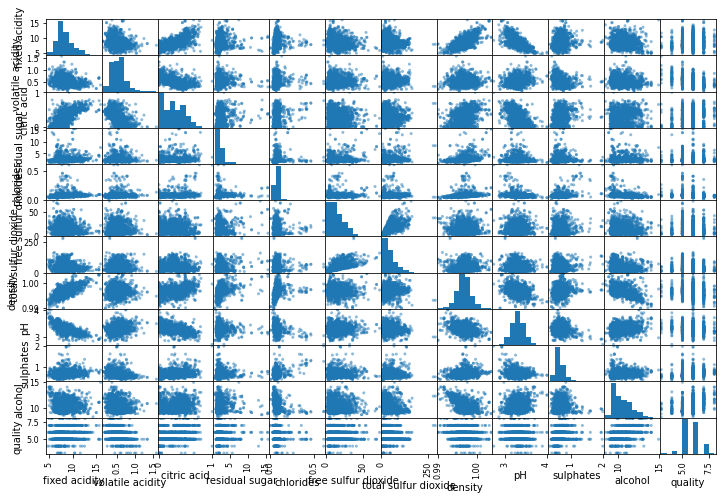

In [91]:
# Esta es la matriz de dispersión de todo el dataset. Como tiene muchas columnas, puede ser un poco tediosa de ver.
pd.plotting.scatter_matrix(datos, figsize=(12,8)); # Nótese el (;), esto es algo de IPython que permite "silenciar" los output.
# En la próxima sesión hablaremos del parámetro figsize.

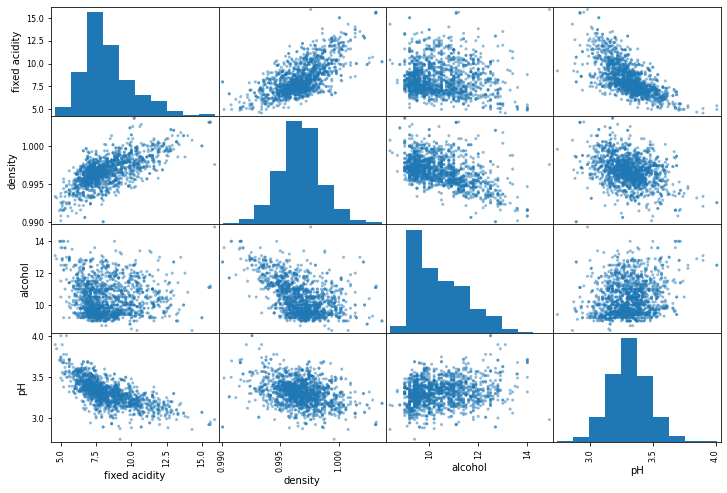

In [92]:
# Nosotros ya sabemos como seleccionar las columnas que queremos.
pd.plotting.scatter_matrix(datos[['fixed acidity', 'density', 'alcohol', 'pH']], figsize=(12,8));

## ¡Ya estamos preparados para aprender más sobre plotting!